**Author: André Igor Nóbrega da Silva**

**andre.silva@embedded.ufcg.edu.br**

**Business Overview**

Airbnb wants to provide an additional feature to their app, they want to recommend a reasonable price for its users, in case those users are going to list proprieties to be rented at their platform, they already have a lot of useful data from previous and current customers. 

Let’s imagine that you were hired by Airbnb, and they want you to use their data to implement the product described above, beyond just recommending a reasonable price, they also are very interested in learning about what makes listings having a higher or lower price so that they can provided a better experience to different customer groups.

**Exploratory Data Analisys**

In order to understand how the price of the listings behave, we need to perform an exploratory data analysis using the listings provided by the AirBnB in the New York City. This EDA is divided in two parts, decribed below:

<img src="https://drive.google.com/uc?id=1hNoaPUmui3HE85DOmCbmdJOFxqofzVgp">

When starting a univariate analysis, it is very important to recognize the types of variables we are dealing with. There are basically two types of variables: qualitative and quantitative. **Quantitative** variables are also known as numeric and express quantities that can be quantized, such as mass, age, price, among others. The **qualitative** variables  describe characteristics, such as genres, symbols, codes. In the univariate analysis, we will understand the behavior of all of the features, maily with the goal of assuring (in future steps) that the data used for predictions is clean and will add significant value to the Machine Learning Pipelines.

The bivariate analysis, on the other hand,  is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. The whole objective of the Exploratory Data Analysis is to create hypothesis and insights about the rules of dependecies between the features of the data. In this work, we will search for relations between features and between features and the price to develop hipothesis about how we can use these features to predict the price. This is also a critical step, since it will allow the company to learn about what make listings have a higher or lower price.

In [0]:
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import pandas as pd
from pyspark.sql import Row
from pyspark.sql.types import IntegerType, StringType, DateType, FloatType
from pyspark.sql.functions import isnan, when, count, col
import matplotlib as mpl
import urllib
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
df = spark.read.load("/FileStore/tables/nyc_airbnb_parquet")



display(df)



id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,null,null,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.975,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


**Univariate Analysis**

As we can see, from the data, we can highlight some columns that have more importance than others. In this univariate analysis, we will explore the following data fields:

. **Neighbourhood and neighbourhood group**: The location of a given listing probably has a big impact on its price. A apartment at the heart of Manhattan with a view to the Central Park is more likely to have a higher price than a suburbian listing, for instance. Therefore, it is very important to explore the values that these fields contain. It is also important to ensure that in future listings, we will have a neighbourhood that is contained within the neighbourhoods listed in this train dataset.

. **Room Type**: The room type probably also provides valuable information. An entire home or apartment, for instance, probably costs higher than a shared room.

. **Name**: The name field contains a description provided by the host about the listing. This is a much more complex field since the information here is highly unstructured (text data). To use this field, it is necessary to use a lot of pre processing, including unsupervised learning algorithms. That being said, there is still the possibility of extracting good information using this feature. For instance, from a description like "Luxurious sunny apartment with a view to the park", we could extract information that indicates a higher price.

. **Latitude and Longitude**: These numerical fields have a similar impact as neighbourhood and neighbourhood group. We will be able to extract the exact location of the listing, which does affect the price. It is also important to ensure that these fields will have coherent values and, therefore, we will analyze if it is necessary to perform a cleaning.

.**Minimum Nights**: The minimum nights field can tell us about requirements to stay in a given listing and, therefore, can affect the price.

.**Availability**: The availability feature represents the amount of days in the year in wich a room is available for renting. This feature can provide us with information about which types of rooms are most in demand, which areas of NY are most in demand or even the values of rooms that most attract customers. Before realizing such insights, we can first observe the distribution of the feature.

. **Price**: Finally, it is also important to understand the distribution of the label. We would like to see a normal distribution of the price.

In [0]:
# Changing the data types of the fields of the dataframe

df = df.withColumn("id", df["id"].cast(IntegerType()))
df = df.withColumn("name", df["name"].cast(StringType()))
df = df.withColumn("host_id", df["host_id"].cast(IntegerType()))
df = df.withColumn("host_name", df["host_name"].cast(StringType()))
df = df.withColumn("neighbourhood_group", df["neighbourhood_group"].cast(StringType()))
df = df.withColumn("neighbourhood", df["neighbourhood"].cast(StringType()))
df = df.withColumn("latitude", df["latitude"].cast(FloatType()))
df = df.withColumn("longitude", df["longitude"].cast(FloatType()))
df = df.withColumn("room_type", df["room_type"].cast(StringType()))
df = df.withColumn("price", df["price"].cast(IntegerType()))
df = df.withColumn("minimum_nights", df["minimum_nights"].cast(IntegerType()))
df = df.withColumn("number_of_reviews", df["number_of_reviews"].cast(IntegerType()))
df = df.withColumn("last_review", df["last_review"].cast(DateType()))
df = df.withColumn("reviews_per_month", df["reviews_per_month"].cast(FloatType()))
df = df.withColumn("calculated_host_listings_count", df["calculated_host_listings_count"].cast(IntegerType()))
df = df.withColumn("availability_365", df["availability_365"].cast(IntegerType()))

# ADD PIPELINE STAGE TO CLEAN AND UNITARY TEST TO CHECK
df = df.filter(df['longitude'] < -73.712991)
df = df.filter(df['price'] > 0) 
df = df.filter(df['minimum_nights'] > 0)


df = df.drop("id", "host_name")

df.createOrReplaceTempView('NyAirBNB')


**Neighbourhood**:


There is a big difference of the number of available rooms between de neighbourhoods of New York. As we can see, while in Willowbrook there is only 1 available room, in Williamsburg there is almost 4000. This shows a big preference for some areas of the city. 

**The 10 most frequent neighbourhoods:**

1° Williamsburg -> 3920(8.01%)

2° Bedford-Stuyvesant -> 3714(7.59%)

3° Harlem -> 2658(5.43%)

4° Bushwick -> 2465(5.04%)

5° Upper West Side -> 1971(4.03%)

6° Hell's Kitchen -> 1958(4.00%)

7° East Village -> 1853(3.78%)

8° Upper East Side -> 1798(3.67%)

9° Crown Heights -> 1564(3.19%)

10° Midtown -> 1545(3.15%)

In [0]:
#neighbourhood

busiest_neighbourhood = spark.sql("""
      select neighbourhood, Count(1) as NumberRooms
      from NyAirBNB
      group by neighbourhood
      order by NumberRooms desc
      limit 10
      """)

least_busy_neighbourhoods = spark.sql("""
      select neighbourhood, Count(1) as NumberRooms
      from NyAirBNB
      group by neighbourhood
      order by NumberRooms 
      limit 10
      """)
priciest = spark.sql("""
      select neighbourhood, AVG(price) as MeanPrice
      from NyAirBNB
      group by neighbourhood
      order by MeanPrice desc
      limit 10
      """)

chepest = spark.sql("""
      select neighbourhood, AVG(price) as MeanPrice
      from NyAirBNB
      group by neighbourhood
      order by MeanPrice 
      limit 10
      """)
display(busiest_neighbourhood)

neighbourhood,NumberRooms
Williamsburg,3913
Bedford-Stuyvesant,3701
Harlem,2642
Bushwick,2457
Upper West Side,1968
Hell's Kitchen,1951
East Village,1849
Upper East Side,1791
Crown Heights,1560
Midtown,1541


In [0]:
display(least_busy_neighbourhoods)

neighbourhood,NumberRooms
Woodrow,1
New Dorp,1
Richmondtown,1
Fort Wadsworth,1
Willowbrook,1
Rossville,1
Silver Lake,2
Lighthouse Hill,2
Howland Hook,2
Westerleigh,2


In [0]:
#neighbourhood

busiest_neighbourhood_gp = spark.sql("""
      select neighbourhood_group, Count(1) as NumberRooms
      from NyAirBNB
      group by neighbourhood_group
      order by NumberRooms desc
      limit 10
      """)

There is also a much higher preference for the areas of Manhattan and Brooklyn. The Queens, Bronx and Staten Island only represent a small percentage of listed rooms. This could introduce a bias to the machine learning pipeline when predicting the price of a certain room. It is important to assure a good distribution of different neighbourhoods.

In [0]:
display(busiest_neighbourhood_gp)

neighbourhood_group,NumberRooms
Manhattan,21593
Brooklyn,20046
Queens,5629
Bronx,1079
Staten Island,370


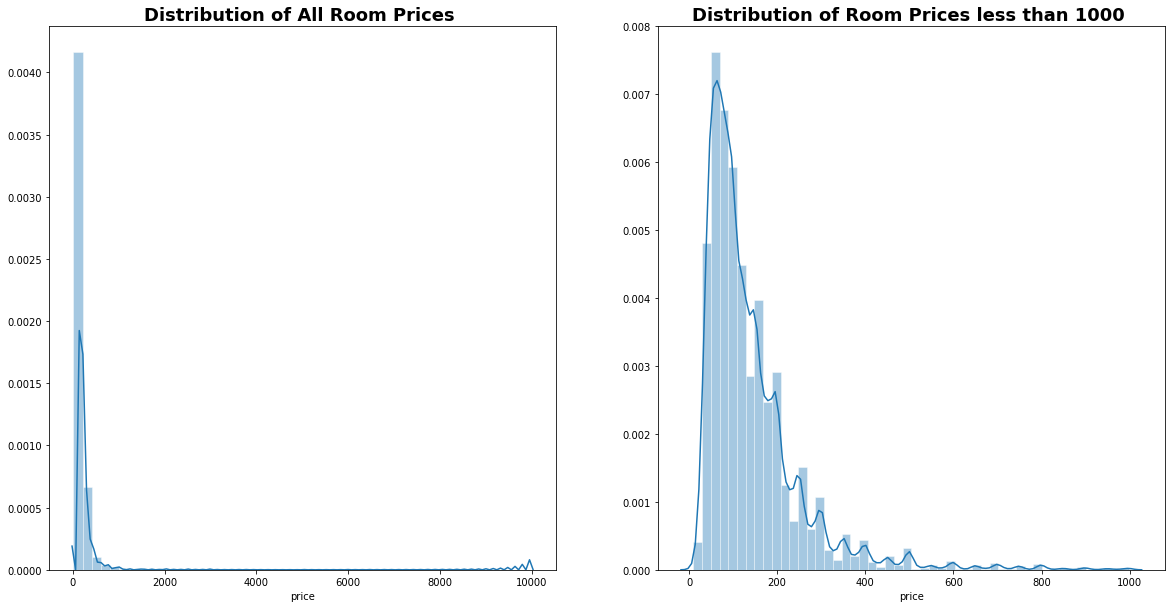

In [0]:
# Price
price = spark.sql("""
  select price
  from NyAirBNB
""")

price_less_1000 = spark.sql("""
   select price
   from NyAirBNB
   where price < 1000
   """)

display(price)

x = price.toPandas()
y = price_less_1000.toPandas()
fig, ax = plt.subplots(figsize = (20,10), nrows = 1, ncols = 2)
sns.set_style("darkgrid")
ax[0].set_title('Distribution of All Room Prices ', fontsize = 18, fontweight = 'bold')
ax[1].set_title('Distribution of Room Prices less than 1000 ', fontsize = 18, fontweight = 'bold')

sns.distplot(x.price, ax = ax[0])
sns.distplot(y.price, ax = ax[1])

plt.show()

As we can see, the price distribution is very skewed to the left, due to the presence of very expensive rooms. 75% of the rooms have a price below $ 150. 95% of the rooms have a price less than $ 400. We can also see that there are rooms that have an outlier price, reaching up to $ 10,000. The price variable also does not have a normalized shape. To use this feature in some future Machine Learning model it would be interesting to apply a logarithmic function or square root with the intention of normalizing the values.

**Minimum Nights**:

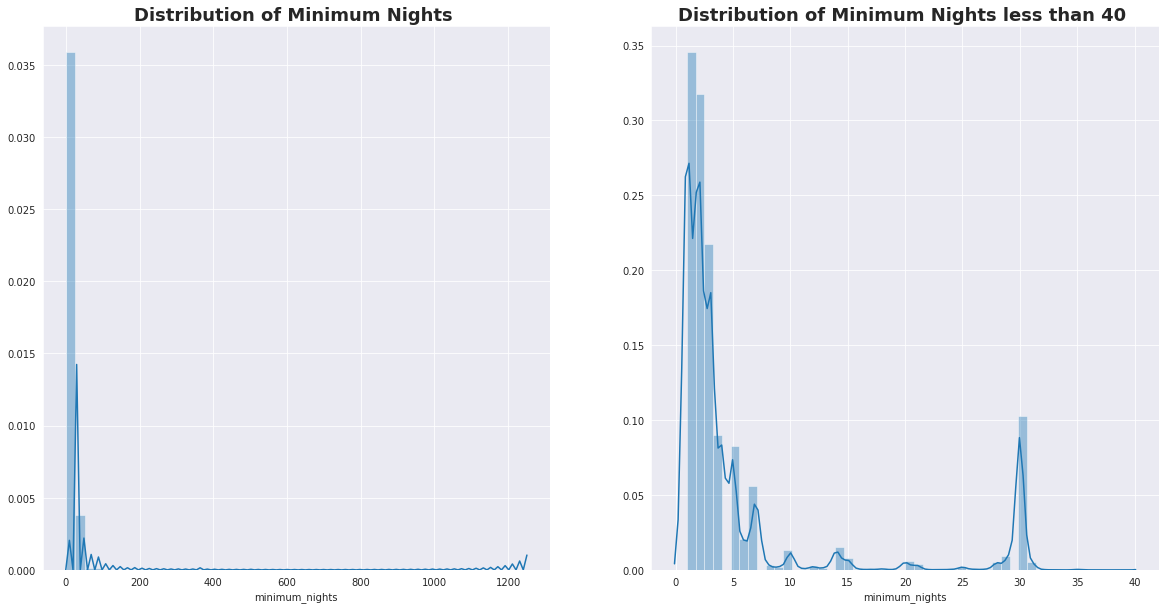

In [0]:
minimum_nights = spark.sql("""
  select minimum_nights
  from NyAirBNB

""")
minimum_nights_less_40 = spark.sql("""
  select minimum_nights
  from NyAirBNB
  where minimum_nights < 40

""")


min_nights_pandas = minimum_nights.toPandas()
min_nights_less_40_pandas = minimum_nights_less_40.toPandas()



fig, ax = plt.subplots(figsize = (20,10), nrows = 1, ncols = 2)
sns.set_style("darkgrid")
ax[0].set_title('Distribution of Minimum Nights ', fontsize = 18, fontweight = 'bold')
ax[1].set_title('Distribution of Minimum Nights less than 40 ', fontsize = 18, fontweight = 'bold')

sns.distplot(min_nights_pandas.minimum_nights, ax = ax[0])
sns.distplot(min_nights_less_40_pandas.minimum_nights, ax = ax[1])


plt.show()
#sns.distplot(y.price, ax = ax[1])
#df.select("minimum_nights").collect()[1].minimum_nights

As we can see, a large number of rooms have a minimum number of nights less than 10 (85%). There is also an interesting peak in rooms where you can only rent for a minimum period of 30 days (equivalent to one month). This indicates a special type of air bnb listing. There are also outliers (1000 minimum nights) values that do not match the reality of AirBnb.

**Statistical Descriptions**:

In [0]:
# Statistical properties of numerical columns
numerical_columns = ["latitude", 'longitude', 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']
for col in numerical_columns:
  df.describe([col]).show()

+-------+--------------------+
summary| latitude|
+-------+--------------------+
 count| 48717|
 mean| 40.72892594241053|
 stddev|0.054488568495818755|
 min| 40.49979|
 max| 40.91306|
+-------+--------------------+

+-------+--------------------+
summary| longitude|
+-------+--------------------+
 count| 48717|
 mean| -73.95224548868546|
 stddev|0.046066717682198076|
 min| -74.24442|
 max| -73.7169|
+-------+--------------------+

+-------+------------------+
summary| price|
+-------+------------------+
 count| 48717|
 mean|152.74197918591045|
 stddev|238.79397964659864|
 min| 10|
 max| 10000|
+-------+------------------+

+-------+------------------+
summary| minimum_nights|
+-------+------------------+
 count| 48717|
 mean| 7.038467064884948|
 stddev|20.540256201415275|
 min| 1|
 max| 1250|
+-------+------------------+

+-------+------------------+
summary| number_of_reviews|
+-------+------------------+
 count| 48717|
 mean|23.253525463390602|
 stddev| 44.55886580813886|
 min| 0|
 max| 629|
+-------+------------------+

+-------+------------------+
summary| reviews_per_month|
+-------+------------------+
 count| 38689|
 mean|1.3697053424055181|
 stddev|1.6776923796776761|
 min| 0.01|
 max| 58.5|
+-------+------------------+

+-------+------------------------------+
summary|calculated_host_listings_count|
+-------+------------------------------+
 count| 48717|
 mean| 7.160662602376994|
 stddev| 33.010725705662495|
 min| 1|
 max| 327|
+-------+------------------------------+

+-------+------------------+
summary| availability_365|
+-------+------------------+
 count| 48717|
 mean|112.61214771024488|
 stddev|131.61829654701737|
 min| 0|
 max| 365|
+-------+------------------+

From the statistical description, we can see some strange values that should not belong to the dataset. This is due to exception handling when casting such fields. We will then remove undue values from the fields longitude, price and minimum_nights.
We also would like to drop the id and host_name columns, since they do not add important information to the analysis. 
If there was any development of a Machine Learning model based on this analysis, it would be interesting not to add the hosts' name as bias.

**Room Availability**:
The availability_365 feature represents the amount of days in the year in wich a room is available for renting. This feature can provide us with information about which types of rooms are most in demand, which areas of NY are most in demand or even the values of rooms that most attract customers. Before realizing such insights, we can first observe the distribution of the feature.

In [0]:

availability = display(spark.sql("""
  select availability_365 as AvailableDaysYear
  from NyAirBNB

"""))



AvailableDaysYear
365
355
365
194
0
129
0
220
0
188


There is a big difference of the number of available rooms between de neighbourhoods of New York. As we can see, while in Willowbrook there is only 1 available room, in Williamsburg there is almost 4000. This shows a big preference for some areas of the city. 

**The 10 most frequent neighbourhoods:**

1° Williamsburg -> 3920(8.01%)

2° Bedford-Stuyvesant -> 3714(7.59%)

3° Harlem -> 2658(5.43%)

4° Bushwick -> 2465(5.04%)

5° Upper West Side -> 1971(4.03%)

6° Hell's Kitchen -> 1958(4.00%)

7° East Village -> 1853(3.78%)

8° Upper East Side -> 1798(3.67%)

9° Crown Heights -> 1564(3.19%)

10° Midtown -> 1545(3.15%)

**Bivariate Analysis**:

**Price and Availability of Room Types**

In [0]:
#room type
room_type = spark.sql("""
      select room_type as RoomType, count(1) as NumberRooms, AVG(price) as MeanPrice, AVG(availability_365) as MeanAvailability
      from NyAirBNB
      group by room_type
      order by room_type

      """)

display(room_type)


RoomType,NumberRooms,MeanPrice,MeanAvailability
Entire home/apt,25343,211.90778518723118,111.85641005405832
Private room,22218,89.54622378251868,110.91857953011072
Shared room,1156,70.25432525951557,161.73010380622839


In [0]:
display(room_type)

RoomType,NumberRooms,MeanPrice,MeanAvailability
Entire home/apt,25343,211.90778518723118,111.85641005405832
Private room,22218,89.54622378251868,110.91857953011072
Shared room,1156,70.25432525951557,161.73010380622839


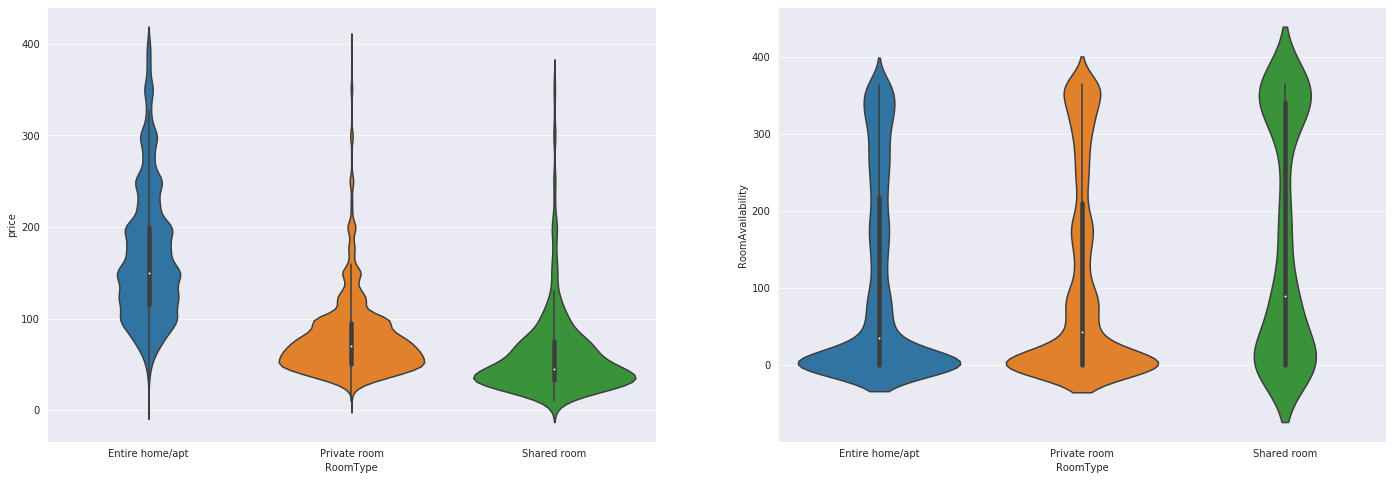

In [0]:
room_type_price = spark.sql("""
      select room_type as RoomType, price, availability_365 as RoomAvailability
      from NyAirBNB
      where price < 400
      order by room_type

      """)



room_type_price_pd = room_type_price.toPandas()
fig, ax = plt.subplots(figsize = (24,8), nrows = 1, ncols = 2)

sns.violinplot(x = 'RoomType',y='price',data = room_type_price_pd, ax = ax[0])
sns.violinplot(x = 'RoomType',y='RoomAvailability',data = room_type_price_pd, ax = ax[1])

ax.grid(True)

As we can see from the pie charts the big majority of rooms are either an entire home/apt or a private room. Only 2% of the rooms are of a shared type. The price of an entire home/apt is significantly higher than the private or the shared room, but to compare the price of these last two, we would need deeper statistical hypothesis tests. 

We can also see that the mean availability of private rooms and entire home/apt is very similar. The shared room has a different distribution of availability. Some of its rooms are available for a very big portion of the year. This means that this type of room is need very popular.

**Price and Availability of Neighbourhood Groups**

This type of analysis is probably the most important to understand the patterns of AirBnb rooms, since price and locations are very big factors when choosing a room to stay.

In [0]:
# Neighbourhood Group
neighbourhood_group = spark.sql("""
  select neighbourhood_group as NeighbourhoodGroup, count(1) as NumberRooms, AVG(price) as MeanPrice, AVG(availability_365) as MeanAvailability
  from NyAirBNB 
  group by neighbourhood_group
  order by neighbourhood_group
  """)

display(neighbourhood_group)

NeighbourhoodGroup,NumberRooms,MeanPrice,MeanAvailability
Bronx,1079,87.8100092678406,165.44578313253012
Brooklyn,20046,124.45425521301007,100.11817819016262
Manhattan,21593,196.75232714305562,111.86101977492706
Queens,5629,99.58305205187422,144.2042991650382
Staten Island,370,114.99459459459459,198.64864864864865


Manhattan and Brooklyn together represent 85% of the total amount of rooms to rent by the AirBnb in New York, while the Bronx, Queenns and Staten Island together only represent 15%. As we can see there is a big preference for Manhattan and Brooklyn. Next we will try to explore the price and availability of the neighbourhoods

In [0]:
display(neighbourhood_group)

NeighbourhoodGroup,NumberRooms,MeanPrice,MeanAvailability
Bronx,1079,87.8100092678406,165.44578313253012
Brooklyn,20046,124.45425521301007,100.11817819016262
Manhattan,21593,196.75232714305562,111.86101977492706
Queens,5629,99.58305205187422,144.2042991650382
Staten Island,370,114.99459459459459,198.64864864864865


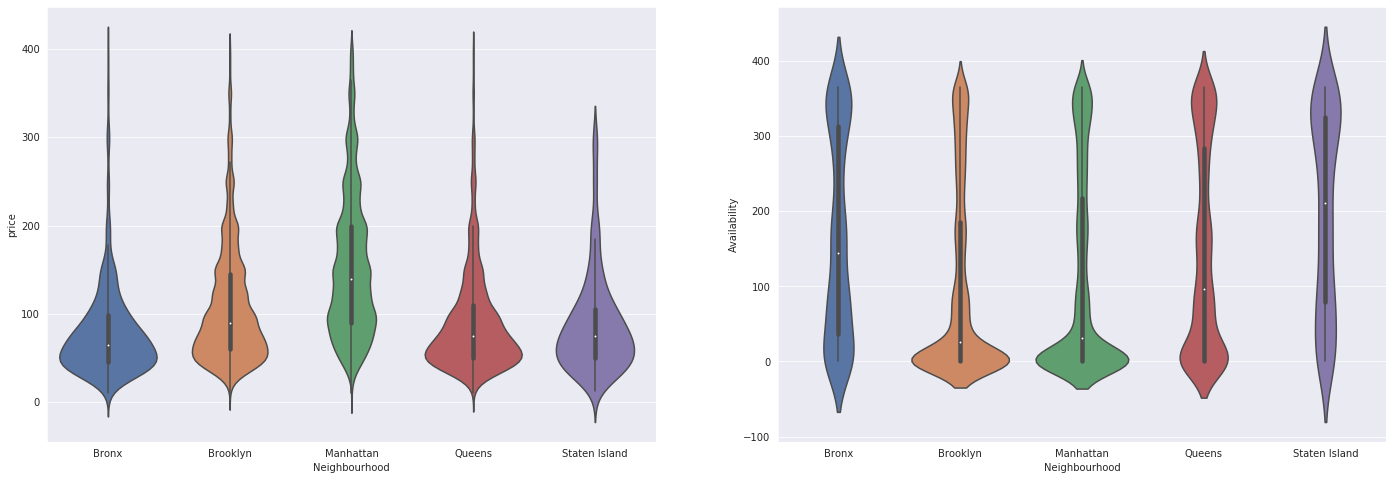

In [0]:
neighbourhood = spark.sql("""
      select neighbourhood_group as Neighbourhood, price, availability_365 as Availability
      from NyAirBNB
      where price < 400
      order by neighbourhood_group

      """)

neighbourhood_group_price = neighbourhood.toPandas()
fig, ax = plt.subplots(figsize = (24,8), nrows = 1, ncols = 2)
sns.set(style = 'darkgrid')
sns.violinplot(x = 'Neighbourhood',y='price',data = neighbourhood_group_price, ax = ax[0])
sns.violinplot(x = 'Neighbourhood',y='Availability',data = neighbourhood_group_price, ax = ax[1])

ax.grid(True)

By looking at the mean and the distribution of the price among the neighbourhood groups, we can see that Manhattan stands out. It is the neighbourhood with the most expensive rooms, with a average price of almost $ 200. Brooklyn is the neighbourhood that is most similar to Manhattan with an average price of $ 124. The other neighbourhoods present a very similar price distribution. They seem to have similar room prices among them.

When looking at the availability distributions, we again confirm that Brooklyn and Manhattan have a similar pattern, while Queens, Staten Island and the Brox have a similar behavior among them. In the first group (Manhattan and Brooklyn) we can see a large number of rooms that are available less then 80 days a year, even tough though the prices in those areas is higher. The secund group, in their turn, have a bigger availability of rooms throughout the year. which means that they are not so wanted by consumers.

Since New York is a very rich city, with a very large tourism, this leads us to believe that Manhattan and Brooklyn have high standard rooms that highly sought after by guests. The Bronx, Queens and Staten Island have more financial acessible rooms that are available for a longer portion of the year.

We can also visualize the price of the rooms by their location in a more immersive way, by looking at the map of New York.

In [0]:
# SQL query to select location, price and availability
locations = spark.sql("""
      select latitude, longitude, price, availability_365, neighbourhood_group
      from NyAirBNB
      where price < 400
      
""")

locations_pd = locations.toPandas()

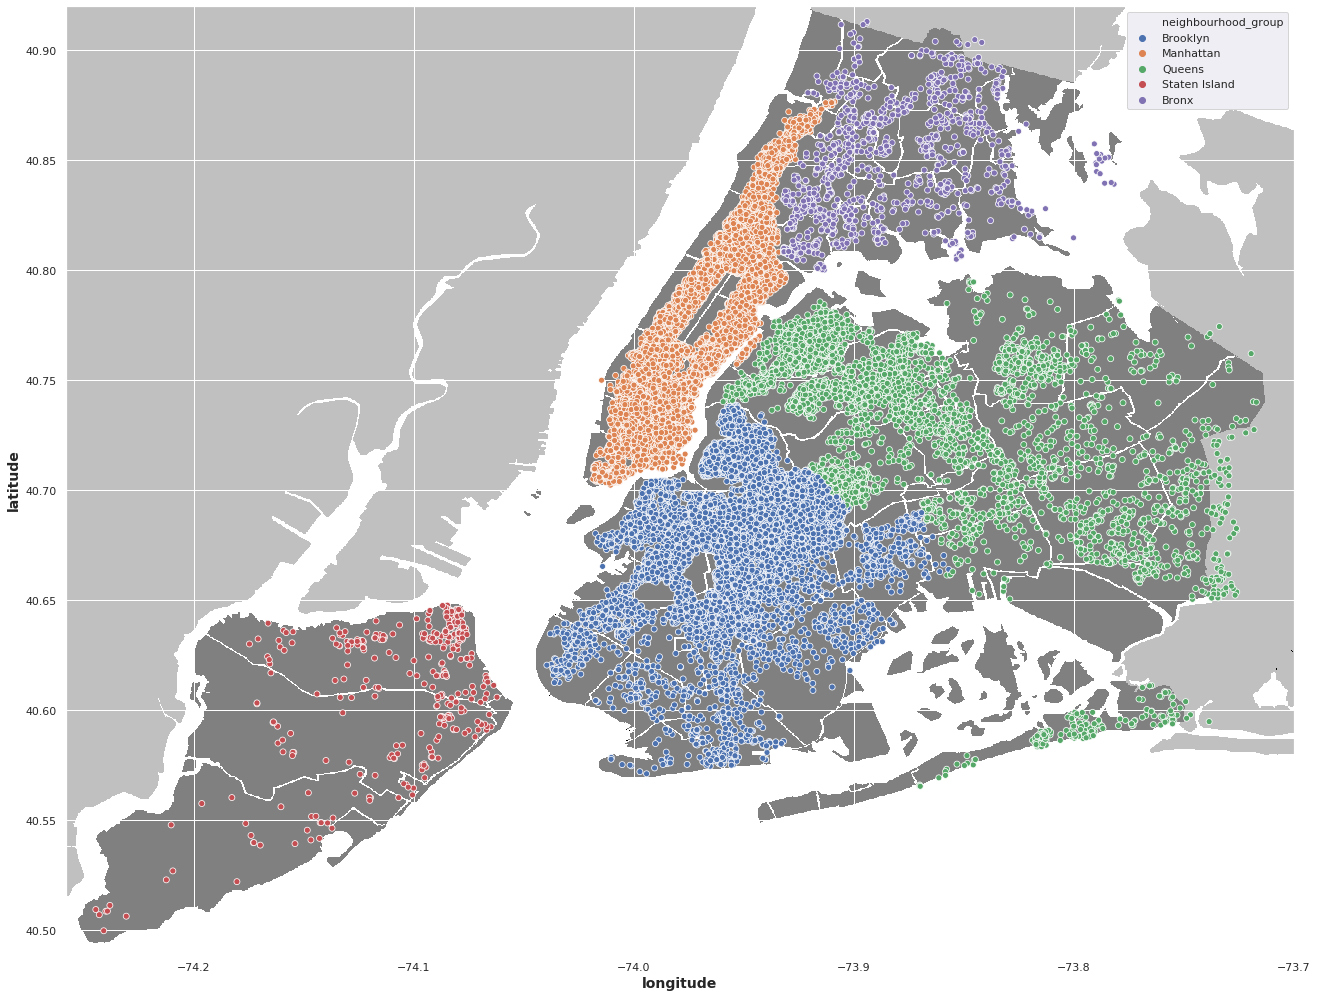

In [0]:
fig,ax = plt.subplots(figsize = (22,18))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()



ax.set_xlabel('Longitude', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Latitude', fontsize = 14, fontweight = 'bold')
sns.scatterplot(x = locations_pd.longitude, y =locations_pd.latitude, hue = locations_pd.neighbourhood_group )
fig.show()

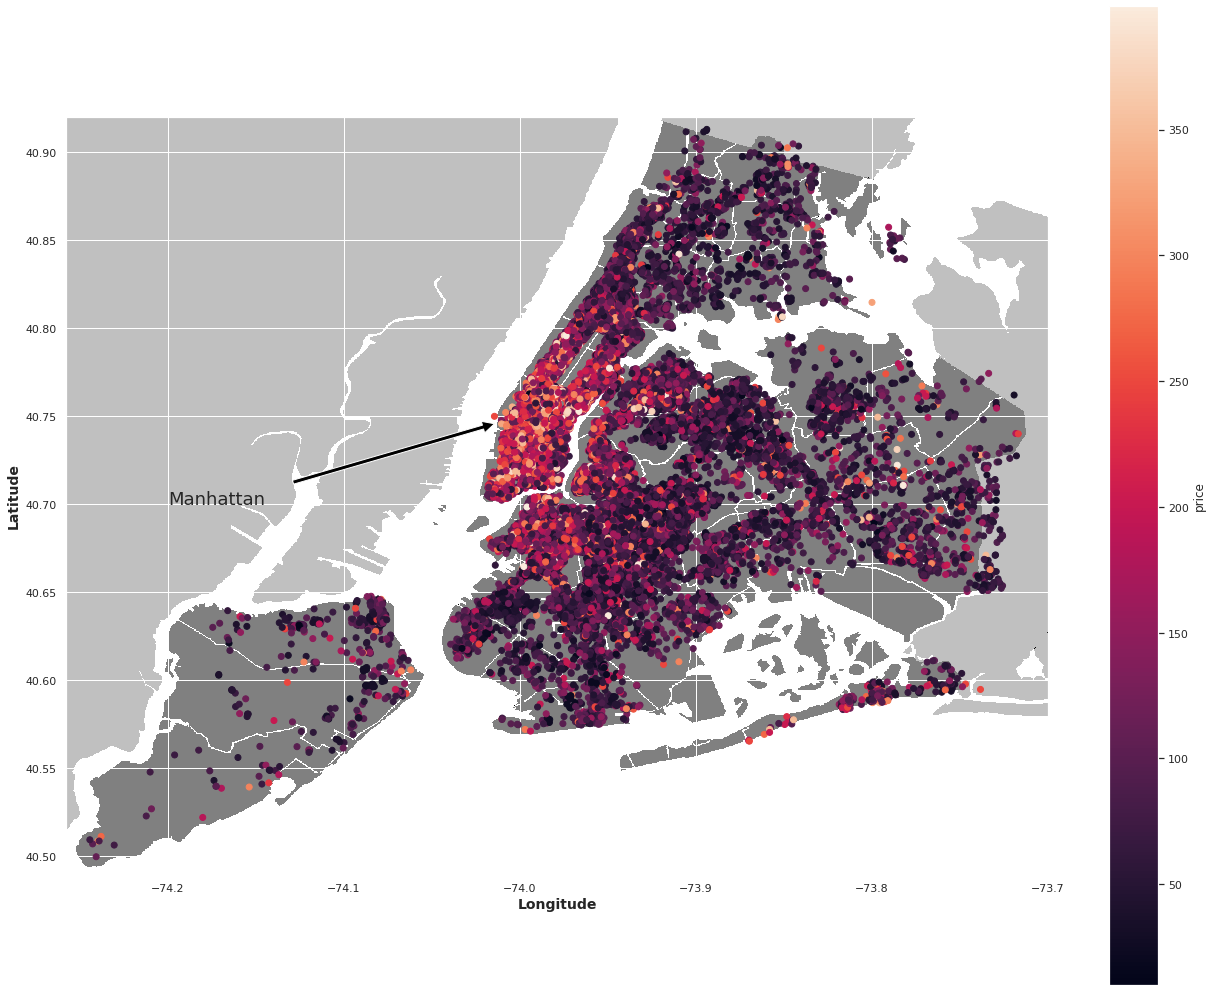

In [0]:
# Transforming to pandas to plot a matplotlib figure

locations_pd = locations.toPandas()


# Importing image from internet
fig,ax = plt.subplots(figsize = (22,18))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

# Plotting the data
ax.set_xlabel('Longitude', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Latitude', fontsize = 14, fontweight = 'bold')
sc = plt.scatter(locations_pd.longitude,locations_pd.latitude, c = locations_pd.price)
ax.annotate('Manhattan', xy= (-74.0, 40.75), xytext = (-74.2, 40.70), arrowprops=dict(facecolor='black', shrink=0.1), fontsize = 18)
plt.colorbar(sc, label = 'price')
fig.show()

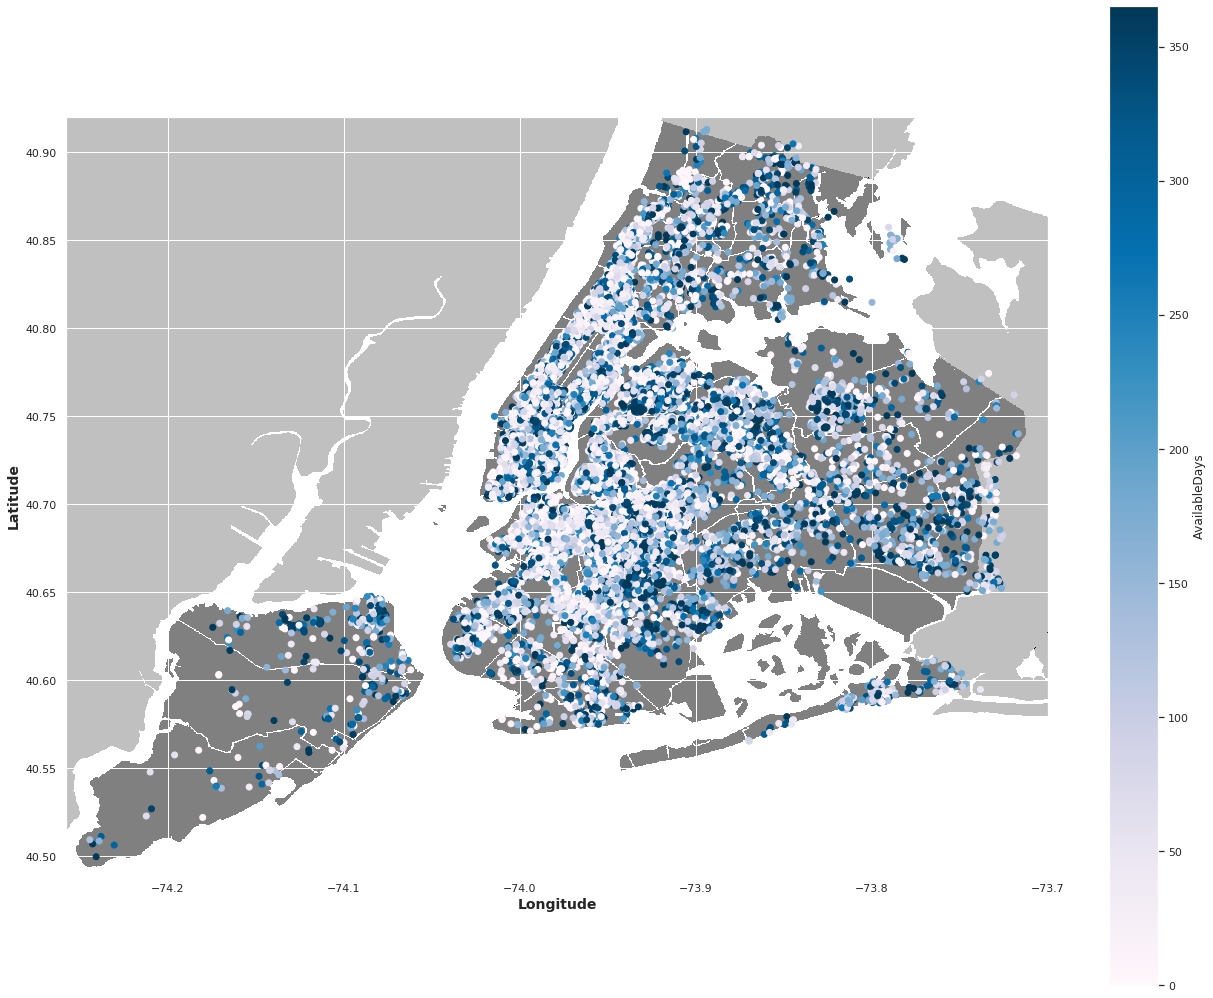

In [0]:
fig,ax = plt.subplots(figsize = (22,18))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
cmap = mpl.cm.cool #mapeamento de cores
ax.set_xlabel('Longitude', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Latitude', fontsize = 14, fontweight = 'bold')
sc = plt.scatter(locations_pd.longitude,locations_pd.latitude, c = locations_pd.availability_365, cmap = 'PuBu')
#ax.annotate('Manhattan', xy= (-74.0, 40.75), xytext = (-74.2, 40.70), arrowprops=dict(facecolor='black', shrink=0.1), fontsize = 14)
plt.colorbar(sc, label = 'AvailableDays')
fig.show()

**Room Type per Neighbourhood Group**

In [0]:
neighbourhood_room_types = spark.sql("""
      select neighbourhood_group as Neighbourhood, room_type as RoomType, count(1) as num
      from NyAirBNB
      group by neighbourhood_group, room_type
      order by neighbourhood_group

      """)

display(neighbourhood_room_types)

Neighbourhood,RoomType,num
Bronx,Shared room,60
Bronx,Entire home/apt,376
Bronx,Private room,643
Brooklyn,Entire home/apt,9536
Brooklyn,Private room,10099
Brooklyn,Shared room,411
Manhattan,Shared room,478
Manhattan,Entire home/apt,13171
Manhattan,Private room,7944
Queens,Private room,3346


From this plot, we can confirm some informations that we had already seem: Entire home/apt and private rooms represent the majority of rooms; Manhattan and Brooklyn are the most traveled destinations. We can also see that the majority of rooms that are of type Entire home/apt are located in Manhattan, while private rooms are majorely located in Brooklyn.

**Price and Availability of Hosts**

In [0]:
#top_hosts

top_hosts = spark.sql("""
      select host_id, count(1) as NumberRooms, AVG(price) as MeanPrice, AVG(availability_365) as MeanAvailability
      from NyAirBNB
      group by host_id
      order by NumberRooms desc
      limit 10
""")

display(top_hosts)

host_id,NumberRooms,MeanPrice,MeanAvailability
219517861,327,253.19571865443424,301.49235474006116
107434423,232,303.1508620689655,253.81034482758622
30283594,121,277.5289256198347,313.42148760330576
137358866,103,43.8252427184466,196.4757281553398
16098958,96,208.95833333333334,292.3229166666667
12243051,96,213.03125,276.6145833333333
61391963,91,146.24175824175825,241.92307692307693
22541573,87,215.4367816091954,312.17241379310343
200380610,65,290.2307692307692,338.03076923076924
1475015,52,103.07692307692308,334.11538461538464


**Price per Availability**:

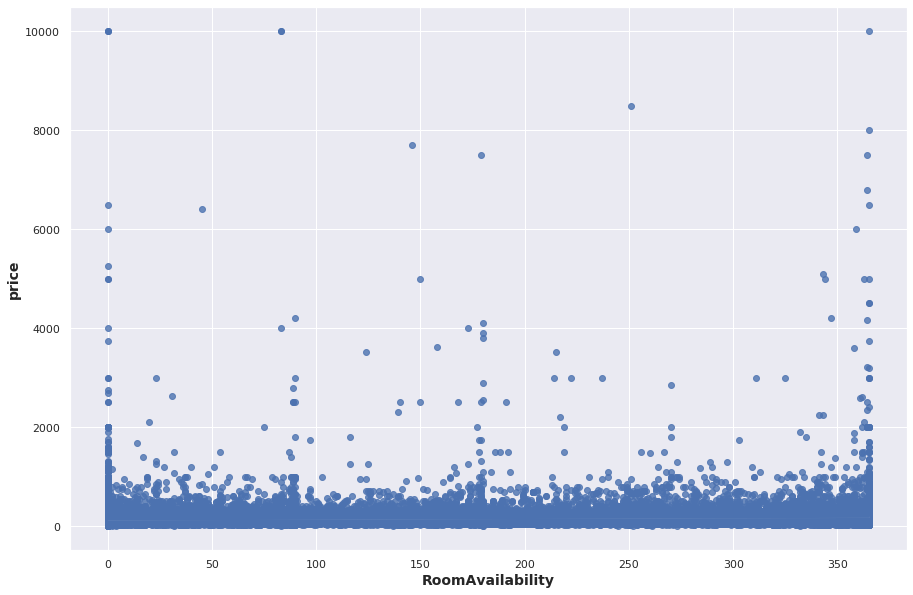

In [0]:
price_availability = spark.sql("""
      select price, availability_365 as RoomAvailability
      from NyAirBNB

""")
price_availability_pd = price_availability.toPandas()

# Plotting the data
fig, ax = plt.subplots(figsize = (15,10))
ax.set_xlabel('Price', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Availability', fontsize = 14, fontweight = 'bold')
sns.regplot(y = price_availability_pd.price,x = price_availability_pd.RoomAvailability, ax = ax)
fig.show()


By looking at the regression plot between the room price and room availability, we don't see a clear relation between these two variables.

**Room Description per Price**

Text descriptions are still some of the most valuable data out there. Although the text data contains a lot of information, it is highly unstructured, and that is especially hard when we are trying to build an intelligent system which interprets and understands free flowing natural language just like humans.

We would like to extract information about different types of rooms (based on price) by looking at their description. We can see which words appear more often for each of the two room types (cheap and expensive). This will give us a sense of the most used vocabulary for each of the classes. Rooms with a price greater than $ 1000 were considered expensive, while rooms with a price lesser than $ 50 were considered cheap.

We start by defining a function that uses the CountVectorizer class from the sklearn package. This class allows us to build the Document-Term Matrix representation for each type of room. The document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. Thus, each of the text data is represented by the amount of unique words that it contains.

In [0]:
# NLP 

def document_term_matrix(dataframe, ngrams = (1,1)):
    """
    Returns a DataFrame that is a DTM with the specified N-Grams and the text data as input
    """
    cv = CountVectorizer(stop_words = "english", ngram_range=ngrams, min_df = 5)
    data_cv = cv.fit_transform(dataframe.name) #Learn the vocabulary dictionary and return document-term matrix.
    
    # data_cv.toarray() returns an array representation of the bag of words
    # get_feature_names returns all the words in the corpus in array-like form
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # create the dtm_dataframe
    
    # reset the index to match de input dataframe index
    data_dtm.index = dataframe.index
    #data_dtm['target_label'] = X_train.target
    return data_dtm

We also define two more functions: one to return the k top N-Grams given a DTM; and finally one to show graph bars of these top k N-Grams.

In [0]:
# Top words for each category

def top_ngrams(k, df):
    '''
    Returns the k top commom ngrams, given a DTM.
    '''
  
    # Aggregate the top ngrams
    word_counts = [df[column].sum() for column in df.columns]
    counted_words_df = pd.DataFrame(word_counts, df.columns)
    
    # Sort from descending order
    top_words = counted_words_df[0].sort_values(ascending = False)[0:k]

    
    return top_words

In [0]:
def plot_top_ngrams(n_grams):
    """
    Plots a bar graph showing the top n-grams for disaster and non disaster tweets
    """
    # Gets the N of N-gram
    n_gram = len((n_grams.index[0]).split())
    n_gram_dict = {1: 'Words', 2: 'Bigrams', 3: 'Trigrams'}
    
    
    fig, axes = plt.subplots(figsize = [10,8], nrows = 1, ncols = 1)
    sns.set(style="darkgrid")
    sns.barplot(y = n_grams.index, x = n_grams.values, ax = axes)

    axes.set_title(f'Top {n_gram_dict[n_gram]}')
    axes.set_xlabel(f'{n_gram_dict[n_gram]} Count')
    axes.set_ylabel(f'{n_gram_dict[n_gram]}')
    axes.grid(True)

    plt.tight_layout()
    plt.show()

In [0]:
expensive_rooms = spark.sql("""
      select name, price
      from NyAirBNB
      where price > 1000
      
""")

cheap_rooms = spark.sql("""
      select name, price
      from NyAirBNB
      where price < 50

      
""")

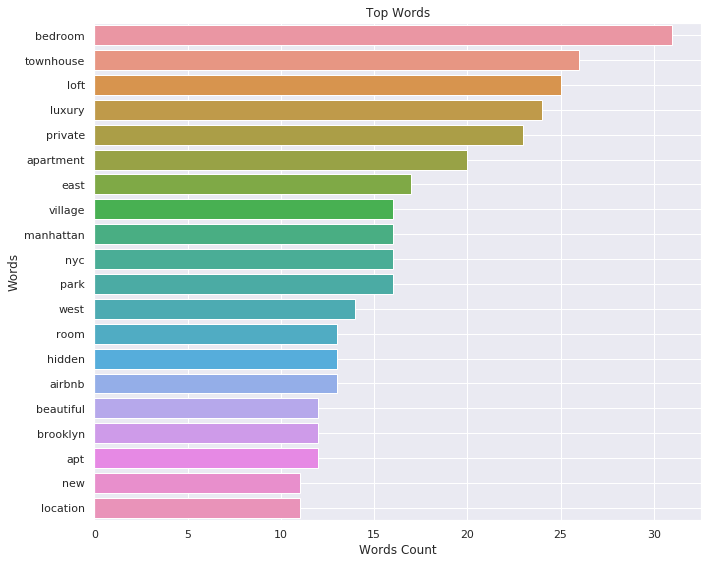

In [0]:
priciest_pd = expensive_rooms.toPandas()

priciest_dtm = document_term_matrix(priciest_pd, (1,1))
priciest_top_words = top_ngrams(20, priciest_dtm)

plot_top_ngrams(priciest_top_words)

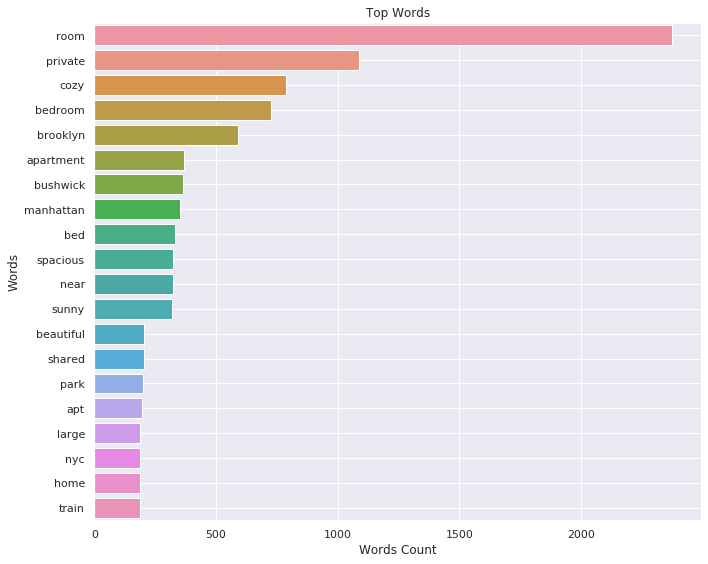

In [0]:
cheapest_pd = cheap_rooms.toPandas()
cheapest_pd.dropna(axis = 0, inplace = True)
cheapest_dtm = document_term_matrix(cheapest_pd, (1,1))
cheapest_top_words = top_ngrams(20, cheapest_dtm)

plot_top_ngrams(cheapest_top_words)

Even though there is a big difference in price between those two types of rooms, the words used to describe them does not change a lot. Hosts tend to describe their rooms based on location and the type of room on both types. Words such as bedroom, room, brooklyn and manhattan appear on both top words list. Hosts simply describe the space and the area where the listing is at. As these rooms in New York probably receives a lot of tourists, and since they're all listed on AirBnb, this simple pattern of description appears on different types of room.

**Findings**

. Most rooms can be rented for less than $ 100, although there are rooms up to $ 10,000

. Most rooms have a minimum number of nights less than 10. Few rooms require a large amount of minimum nights, however, there is a surge in the number of rooms that require a minimum amount of one month for rent.

. There is a big difference of the number of available rooms between de neighborhoods of New York. As we can see, while in Willowbrook there is only 1 available room, in Williamsburg there is almost 4000. This shows a big preference for some areas of the city.

.The big majority of rooms are either an entire home / apt or a private room. Only 2% of the rooms are of a shared type.

. Manhattan and Brooklyn together represent 85% of the total amount of rooms to rent by the AirBnb in New York, while the Bronx, Queenns and Staten Island together only represent 15%.

. Manhattan has the most expensive rooms, and also the less available rooms throughout the year

. The majority of rooms that are of type Entire home / apt are located in Manhattan, while private rooms are majorely located in Brooklyn.

.There is not a clear relation between the room price and its availability

.There is not a clear relation between the room description and its price.